In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import folium
from tqdm.notebook import tqdm, trange
import time
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder, OrdinalEncoder
import sklearn.metrics as metrics
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline

In [2]:
df = pd.read_csv('data/kc_house_data.csv')

In [3]:
pd.set_option('max_columns', 999)

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [10]:
df_wanted = df.drop(['id', 'date', 'lat', 'long'], axis=1)

In [12]:
df_wanted.waterfront

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
21592    0.0
21593    0.0
21594    0.0
21595    0.0
21596    0.0
Name: waterfront, Length: 21597, dtype: float64

In [13]:
df_wanted['waterfront'] = df_wanted['waterfront'].fillna(0.0)
df_wanted['waterfront'].value_counts()

0.0    21451
1.0      146
Name: waterfront, dtype: int64

In [25]:
df_wanted.yr_renovated

0           0.0
1        1991.0
2           NaN
3           0.0
4           0.0
          ...  
21592       0.0
21593       0.0
21594       0.0
21595       0.0
21596       0.0
Name: yr_renovated, Length: 21597, dtype: float64

In [15]:
df_wanted['yr_renovated'] = df_wanted['yr_renovated'].fillna(0.0)
df_wanted['yr_renovated'].value_counts()

0.0       20853
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [16]:
df_wanted['sqft_basement'] = df_wanted['sqft_basement'].replace('?','0.0')
df_wanted['sqft_basement'].value_counts()

0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
516.0         1
374.0         1
2300.0        1
704.0         1
1770.0        1
Name: sqft_basement, Length: 303, dtype: int64

In [17]:
df_wanted['sqft_basement'] = df_wanted['sqft_basement'].astype(float)

In [18]:
X = df_wanted.drop('price', axis=1)
y = df_wanted['price']

In [19]:
formula = 'price ~' + '+'.join(X)
model = ols(formula, data=df_wanted).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     2540.
Date:                Tue, 01 Jun 2021   Prob (F-statistic):               0.00
Time:                        16:22:23   Log-Likelihood:            -2.9500e+05
No. Observations:               21534   AIC:                         5.900e+05
Df Residuals:                   21517   BIC:                         5.902e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      7.124e+06   3.12e+06      2.281      0.023       1e+06    1.32e+07
bedrooms      -3.943e+04   2035.602    -19.372      0.000   -4.34e+04   -3.54e+04
bathrooms       4.56e+04   3496.415     13.042      0.000    3.87e+04    5.25e+04
sqft_living     111.6012     19.349      5.768      0.000      73.676     149.526
sqft_lot         -0.0032      0.051     -0.062      0.951      -0.104       0.097
floors         2.721e+04   3833.225      7.099      0.000    1.97e+04    3.47e+04
waterfront     5.907e+05   1.95e+04     30.304      0.000    5.53e+05    6.29e+05
view           4.519e+04   2263.054     19.967      0.000    4.08e+04    4.96e+04
condition      2.006e+04   2511.478      7.988      0.000    1.51e+04     2.5e+04
grade          1.208e+05   2259.573     53.440      0.000    1.16e+05    1.25e+05
sqft_above       48.3585     19.324      2.502      0.012      10.481      86.235
sqft_basement    54.6021     19.169      2.848      0.004      17.029      92.175
yr_built      -3572.9417     73.749    -48.447      0.000   -3717.496   -3428.388
yr_renovated     14.4260      4.256      3.390      0.001       6.085      22.767
zipcode          -9.4720     31.345     -0.302      0.763     -70.911      51.967
sqft_living15    24.2285      3.648      6.641      0.000      17.078      31.379
sqft_lot15       -0.5623      0.078     -7.183      0.000      -0.716      -0.409
==============================================================================
Omnibus:                    16159.252   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1151575.031
Skew:                           3.005   Prob(JB):                         0.00
Kurtosis:                      38.318   Cond. No.                     2.14e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.14e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
df_wanted = df_wanted.drop(['sqft_lot', 'zipcode', 'view', 'condition', 'grade'], axis=1)

In [25]:
Z = df_wanted.drop('price', axis=1)
w = df_wanted['price']

In [26]:
formula = 'price ~' + '+'.join(Z)
model = ols(formula, data=df_wanted).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     2920.
Date:                Tue, 01 Jun 2021   Prob (F-statistic):               0.00
Time:                        16:23:24   Log-Likelihood:            -2.9755e+05
No. Observations:               21597   AIC:                         5.951e+05
Df Residuals:                   21585   BIC:                         5.952e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       6.44e+06   1.37e+05     47.161      0.000    6.17e+06    6.71e+06
bedrooms      -5.904e+04   2158.639    -27.350      0.000   -6.33e+04   -5.48e+04
bathrooms      6.643e+04   3751.392     17.708      0.000    5.91e+04    7.38e+04
sqft_living     197.8027     20.850      9.487      0.000     156.936     238.669
floors         5.551e+04   4025.461     13.789      0.000    4.76e+04    6.34e+04
waterfront     7.614e+05   1.96e+04     38.855      0.000    7.23e+05       8e+05
sqft_above       42.2766     20.851      2.028      0.043       1.407      83.146
sqft_basement    47.0719     20.721      2.272      0.023       6.457      87.687
yr_built      -3350.1002     70.949    -47.218      0.000   -3489.166   -3211.035
yr_renovated     16.2163      4.540      3.572      0.000       7.317      25.116
sqft_living15    90.9256      3.677     24.725      0.000      83.717      98.134
sqft_lot15       -0.7009      0.060    -11.648      0.000      -0.819      -0.583
==============================================================================
Omnibus:                    14126.136   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           587771.112
Skew:                           2.582   Prob(JB):                         0.00
Kurtosis:                      28.030   Cond. No.                     2.60e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.6e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
formula = 'price ~ sqft_living + sqft_above + sqft_living15' 
model = ols(formula, data=df_wanted).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     7231.
Date:                Tue, 01 Jun 2021   Prob (F-statistic):               0.00
Time:                        16:26:15   Log-Likelihood:            -2.9988e+05
No. Observations:               21597   AIC:                         5.998e+05
Df Residuals:                   21593   BIC:                         5.998e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -9.975e+04   5419.172    -18.407      0.000    -1.1e+05   -8.91e+04
sqft_living     267.8369      4.265     62.798      0.000     259.477     276.197
sqft_above      -37.3141      4.540     -8.219      0.000     -46.213     -28.415
sqft_living15    75.3031      4.037     18.653      0.000      67.390      83.216
==============================================================================
Omnibus:                    15592.381   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           693332.894
Skew:                           2.985   Prob(JB):                         0.00
Kurtosis:                      30.108   Cond. No.                     1.11e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
df_wanted_columns = ['sqft_living', 'sqft_above', 'sqft_living15']

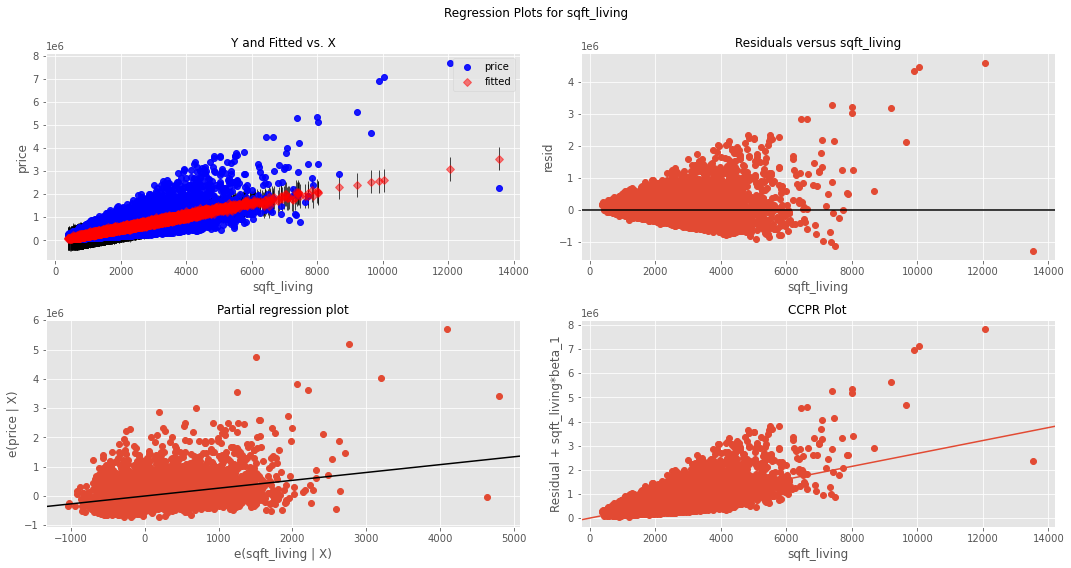

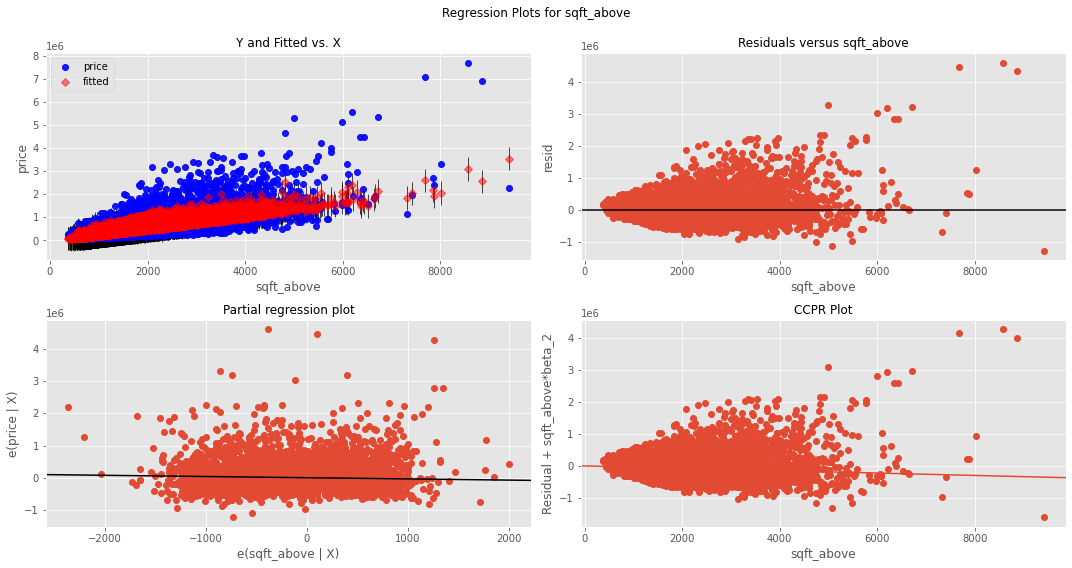

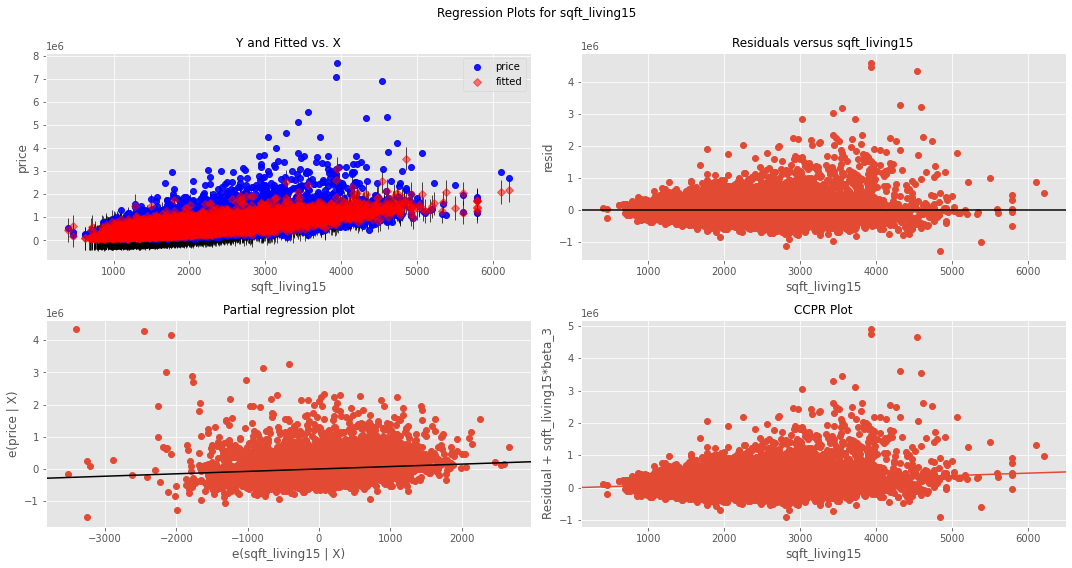

In [38]:
for i in df_wanted_columns:
    fig = plt.figure(figsize=(15,8))
    fig = sm.graphics.plot_regress_exog(model, i, fig=fig)
    plt.show()

In [29]:
cor = df_wanted.corr()
cor_target_price = cor['price']
relevant_columns_price = cor_target_price[cor_target_price > .5]
relevant_columns_price

price            1.000000
bathrooms        0.525906
sqft_living      0.701917
sqft_above       0.605368
sqft_living15    0.585241
Name: price, dtype: float64

In [30]:
worst_columns_price = cor_target_price[cor_target_price < .3]
worst_columns_price

floors          0.256804
waterfront      0.264306
yr_built        0.053953
yr_renovated    0.117855
sqft_lot15      0.082845
Name: price, dtype: float64

In [31]:
price_corrs = df_wanted.corr()['price'].map(abs).sort_values(ascending=False)
price_corrs

price            1.000000
sqft_living      0.701917
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
sqft_basement    0.321108
bedrooms         0.308787
waterfront       0.264306
floors           0.256804
yr_renovated     0.117855
sqft_lot15       0.082845
yr_built         0.053953
Name: price, dtype: float64

In [66]:
# Folium

# lat = 47.47
# long = -121.84

# base_map = folium.Map([lat,long], zoom_start=15)

# x = df['lat']
# y = df['long']
# points = list(zip(x,y))
# for p in points:
  #  lat = p[0]
     # long = p[1]
    # marker = folium.Marker(location = [lat, long])
    # marker.add_to(base_map)

# base_map

In [67]:
df_wanted_columns = ['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'sqft_living15', 'sqft_lot15']

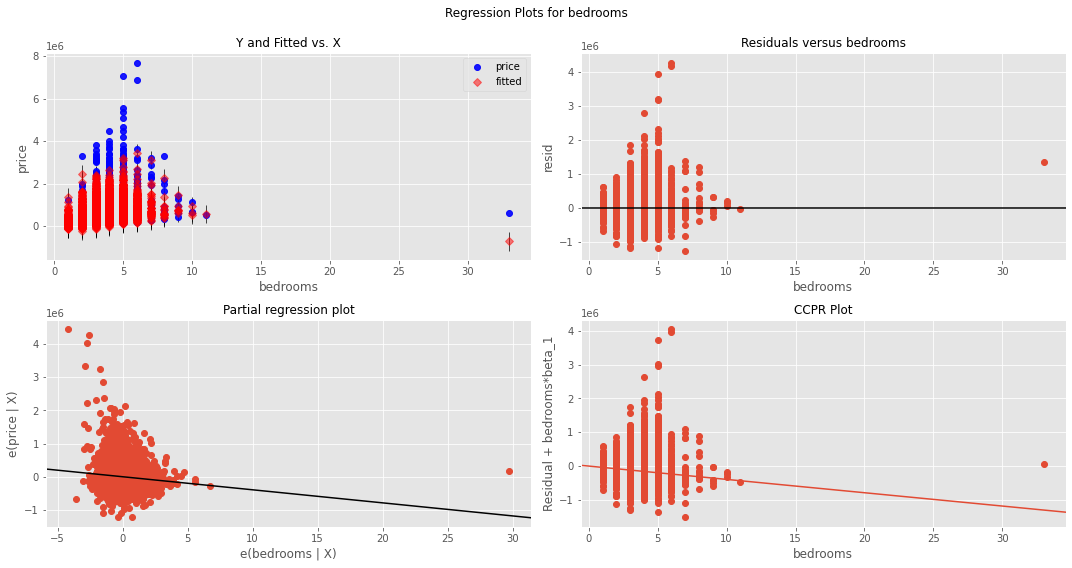

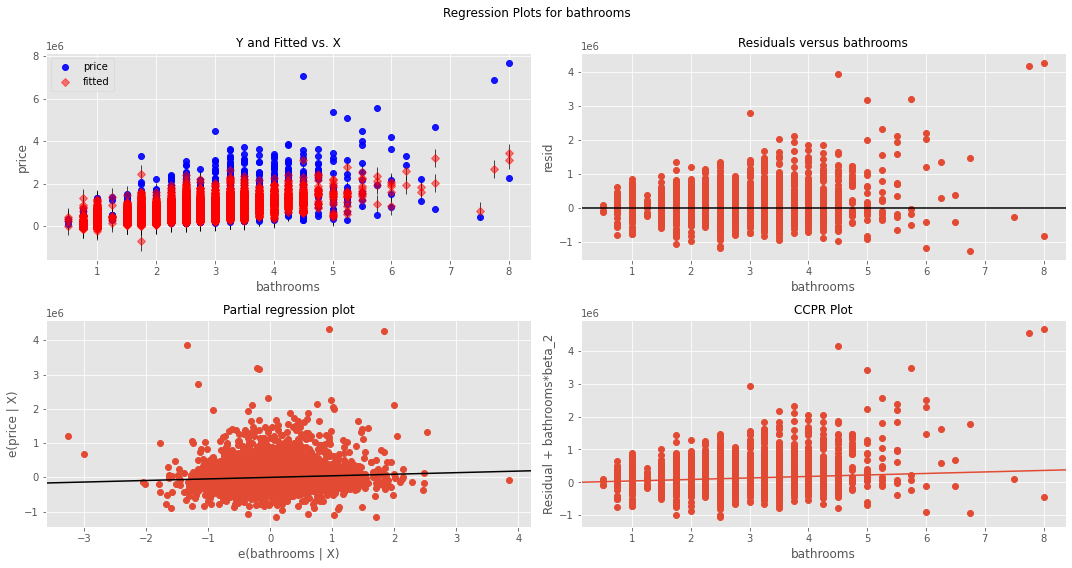

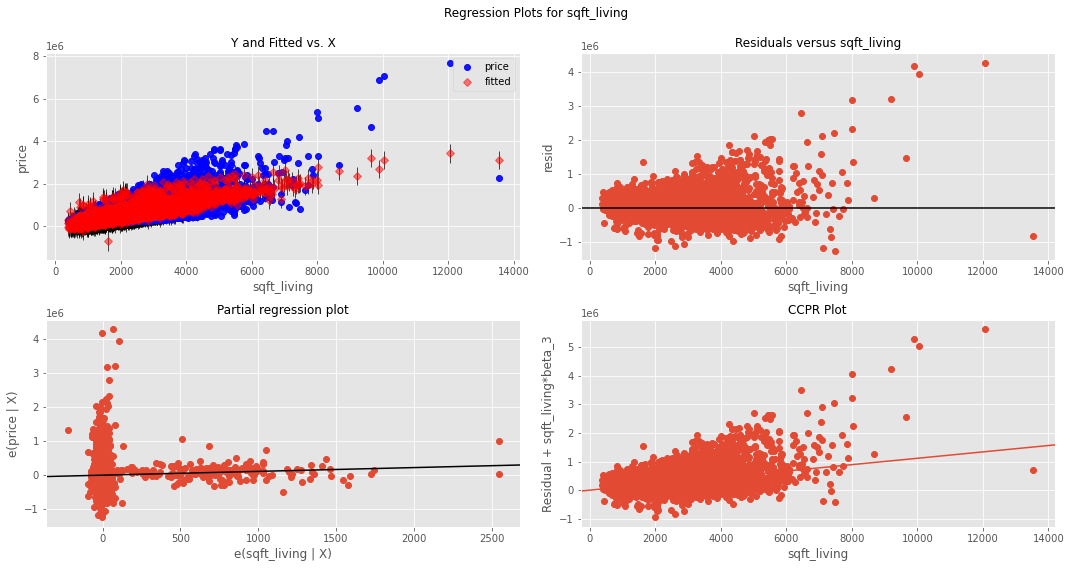

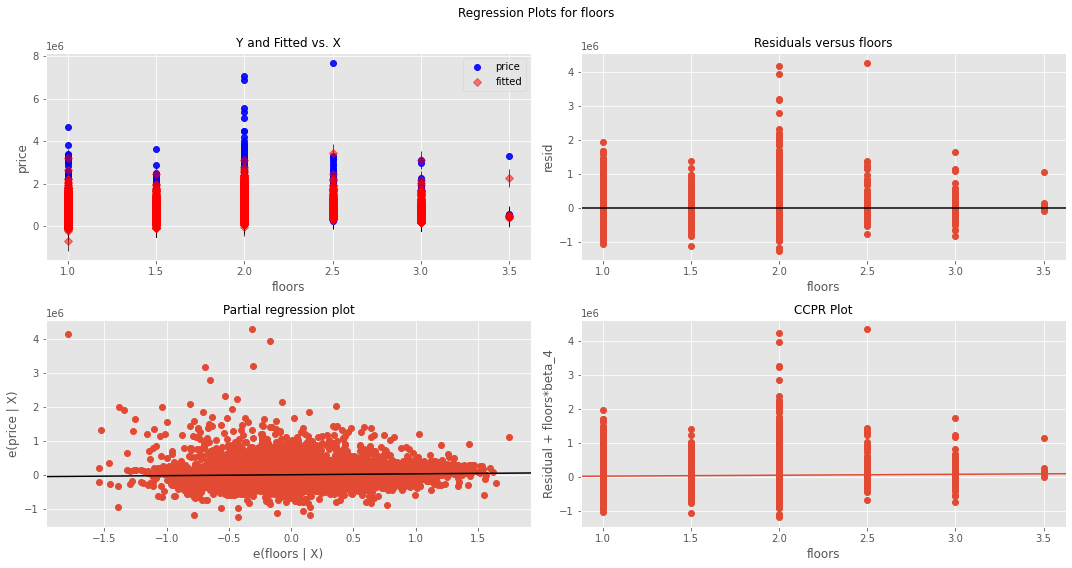

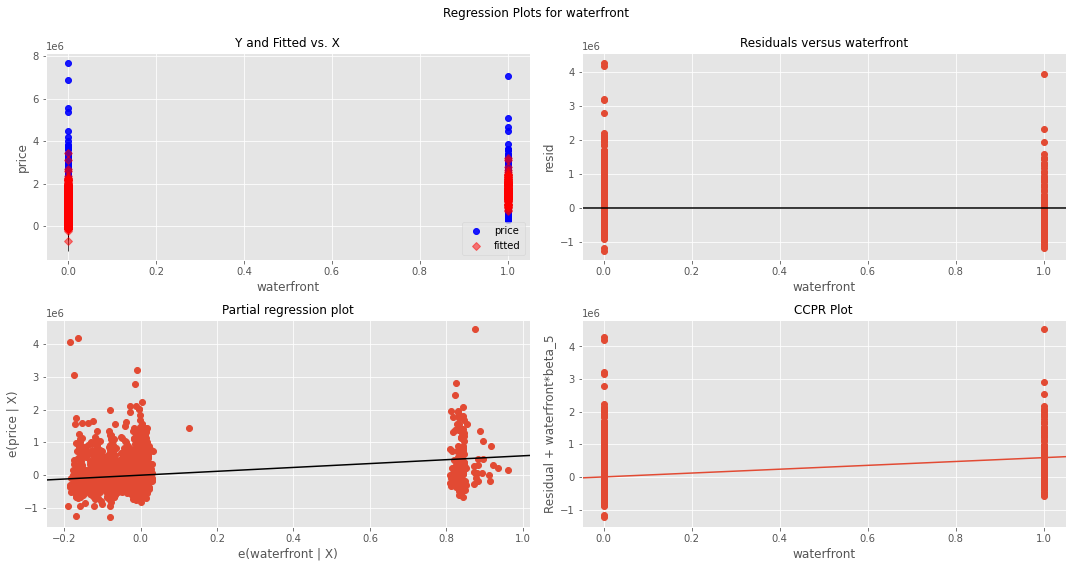

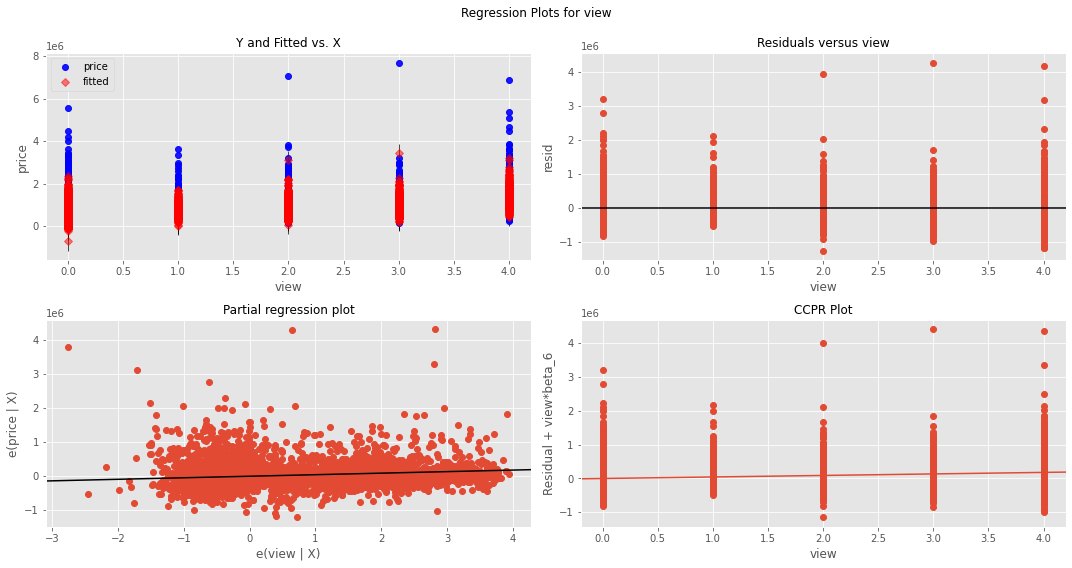

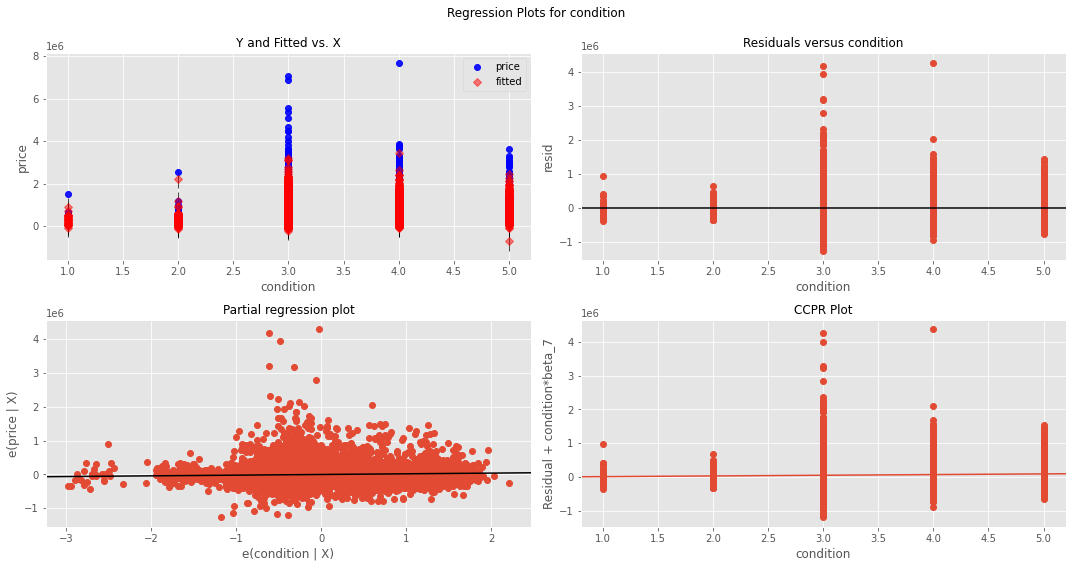

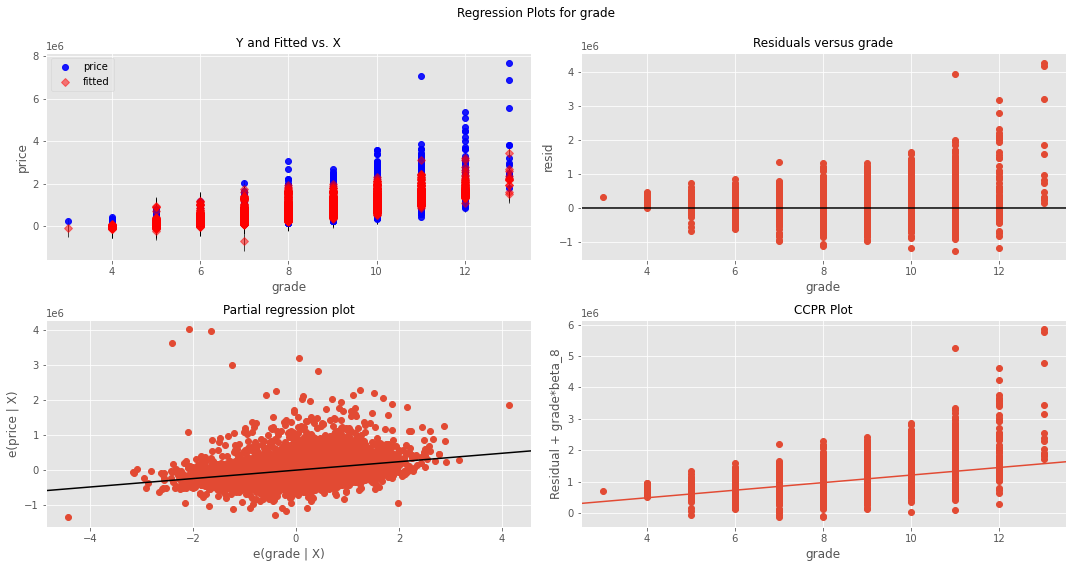

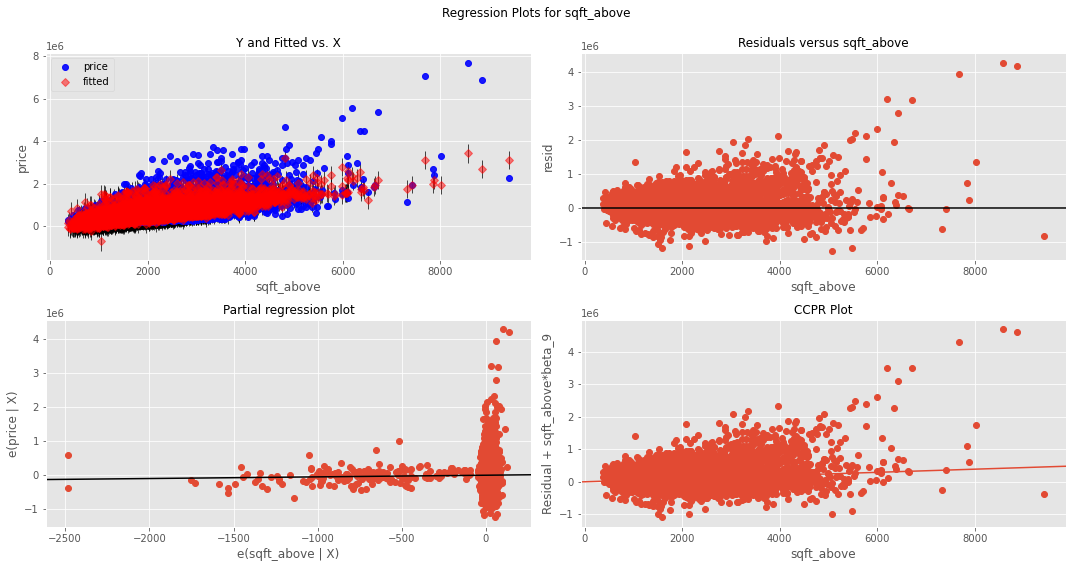

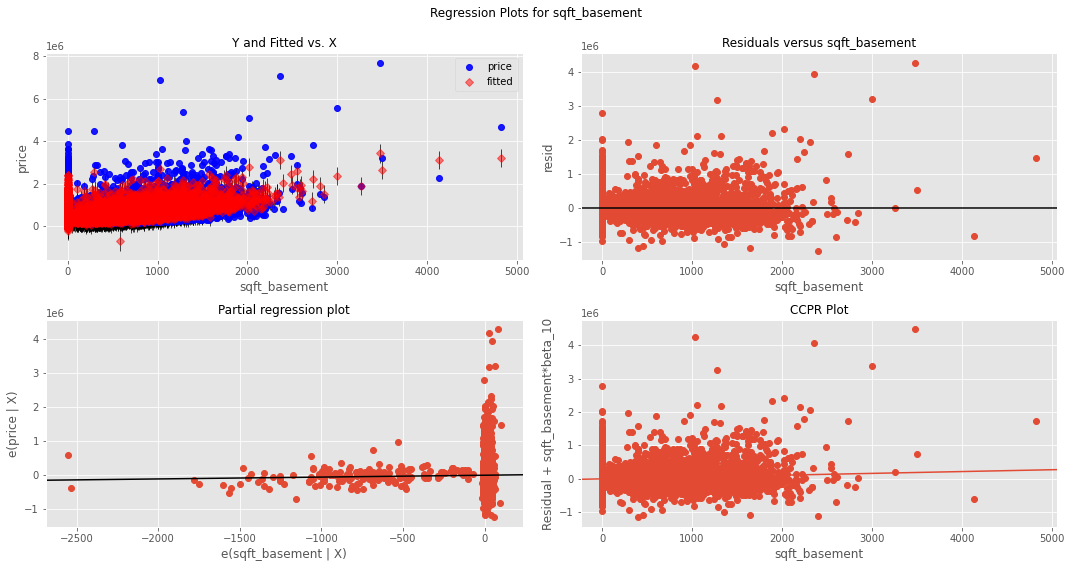

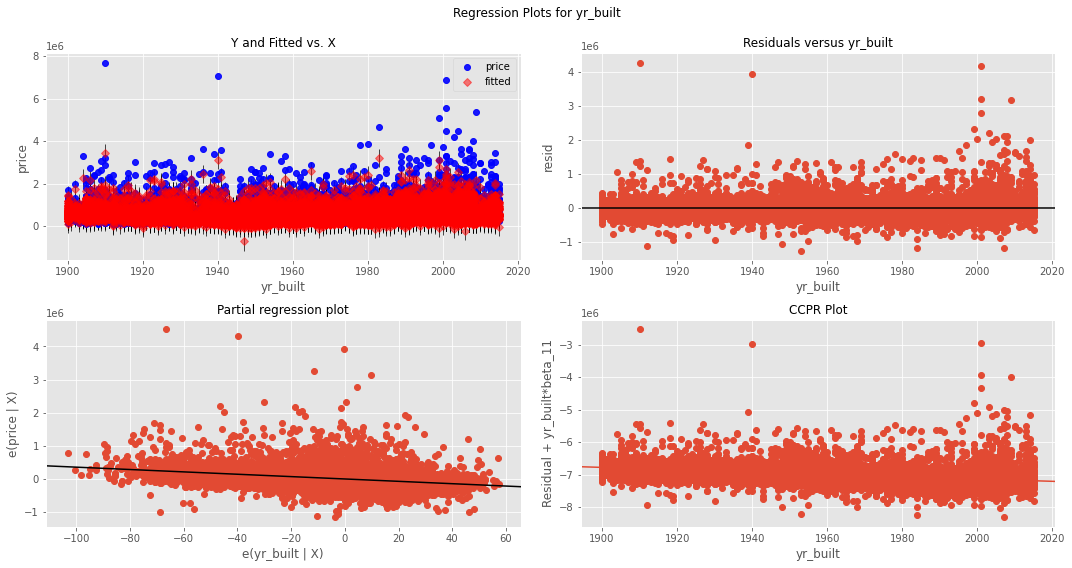

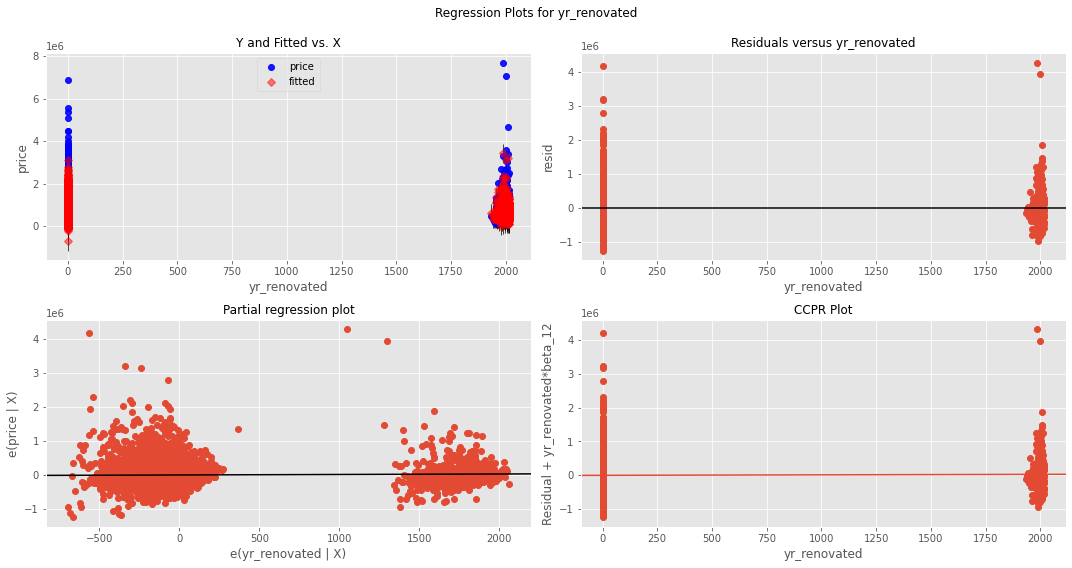

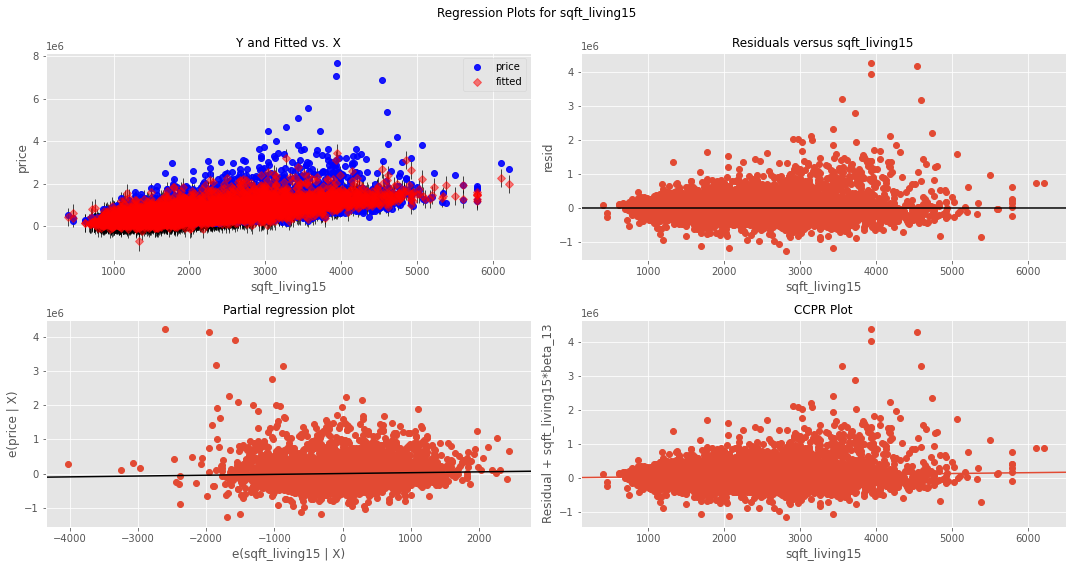

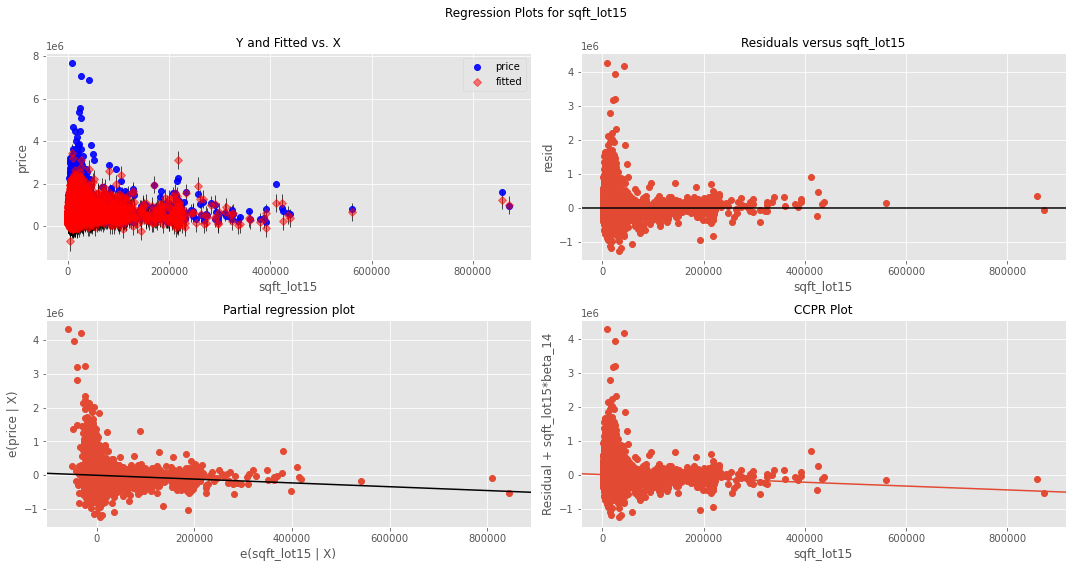

In [68]:
for i in df_wanted_columns:
    fig = plt.figure(figsize=(15,8))
    fig = sm.graphics.plot_regress_exog(model, i, fig=fig)
    plt.show()

<Figure size 1080x576 with 0 Axes>

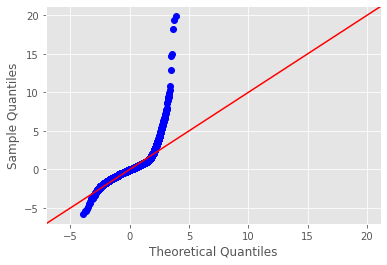

In [69]:
resid = model.resid

fig = plt.figure(figsize=(15,8))
fig = sm.graphics.qqplot(resid, dist=stats.norm, line='45', fit=True);

In [ ]:
df_drop['bedrooms_bathrooms'] = df['bedrooms'] * df['bathrooms']

In [ ]:
df_drop['ttl_sqft_bathrooms' ] = df_drop['bathrooms'] * df_drop['total_sqft']

In [ ]:
df_drop['sqft_living_sqft_above'] = df_drop['sqft_living'] * df_drop['sqft_above']

In [ ]:
df_drop['view_total sqft'] = df_drop['view']

In [ ]:
df_drop_ohe = df_drop[['condition']]
ohe = OneHotEncoder(categories='auto', sparse=False, handle_unknown='ignore')
ohe.fit(df_drop_ohe)
ohe.categories_

In [ ]:
df_drop_ohe_encoded = ohe.transform(df_drop_ohe)
df_drop_ohe_encoded

In [ ]:
df_drop_ohe_encoded = pd.DataFrame(df_drop_ohe_encoded, columns = ohe.categories_[0],\
                                   index = df_drop.index)
df_drop_ohe_encoded

In [ ]:
df_drop.drop('condition', axis=1, inplace=True)

In [ ]:
df_drop = pd.concat([df_drop_ohe_encoded, df_drop], axis=1)

In [ ]:
df_drop.rename({'1': 'Condition_Rating: 1', '2': 'Condition_Rating: 2', '3': 'Condition_Rating: 3', '4': 'Condition_Rating: 4', '5': 'Condition_Rating: 5'}, axis = 1, inplace = True,errors = 'Raise')

In [ ]:
df_drop.drop('index', axis = 1, inplace = True)